This is a Simple Crime Analysis. I have used Dataset from Kaggle: Crime Data uploaded by: Isha

### Data Source
This analysis uses the [Crime Data](https://www.kaggle.com/datasets/ishajangir/crime-data) dataset by **Isha Jangir** on Kaggle.  
Used solely for educational and non-commercial purposes.

Importing Libraries

In [319]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading Data File

In [320]:
df = pd.read_csv('Data.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,9/9/2020 0:00,9/9/2020 0:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


Trying to Find the features of Dataset

In [321]:
features = df.columns
features

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Finding Total Number of Data: 1005198

In [322]:
df.index

RangeIndex(start=0, stop=1005198, step=1)

Finding Null Elements

In [323]:
(df.notnull() == False).sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151760
Vict Age                0
Vict Sex           144782
Vict Descent       144794
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677918
Weapon Desc        677918
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           936039
Crm Cd 3          1002884
Crm Cd 4          1005134
LOCATION                0
Cross Street       850955
LAT                     0
LON                     0
dtype: int64

Dropping Unnessary Features

In [324]:
df = df.drop(['DR_NO', 'Date Rptd', 'Part 1-2', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT', 'LON', 'Premis Desc', 'Vict Descent', 'Weapon Used Cd',	'Weapon Desc'	], axis=1)

Filling unknown values and dropping some data

In [325]:
mean_age = df['Vict Age'].mean()
df['Mocodes'] = df['Mocodes'].fillna(0)
df['Vict Sex'] = df['Vict Sex'].dropna(axis=0)
df = df.dropna(axis=0)

In [326]:
df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Status,Status Desc,LOCATION
0,3/1/2020 0:00,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,101.0,AA,Adult Arrest,1900 S LONGWOOD AV
1,2/8/2020 0:00,1800,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,128.0,IC,Invest Cont,1000 S FLOWER ST
2,11/4/2020 0:00,1700,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,502.0,IC,Invest Cont,1400 W 37TH ST
3,3/10/2020 0:00,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,405.0,IC,Invest Cont,14000 RIVERSIDE DR
6,7/7/2020 0:00,1340,2,Rampart,265,648,ARSON,0329 1402 2004 1501,0,X,101.0,IC,Invest Cont,JAMES M WOOD


Converting Date-time to only Date

In [327]:
df['Date'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop(['Date', 'DATE OCC', 'Status'], axis=1)

In [328]:
df.head()

,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Status Desc,LOCATION,Year,Month,Day
0,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,101.0,Adult Arrest,1900 S LONGWOOD AV,2020,3,1
1,1800,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,128.0,Invest Cont,1000 S FLOWER ST,2020,2,8
2,1700,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,502.0,Invest Cont,1400 W 37TH ST,2020,11,4
3,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,405.0,Invest Cont,14000 RIVERSIDE DR,2020,3,10
6,1340,2,Rampart,265,648,ARSON,0329 1402 2004 1501,0,X,101.0,Invest Cont,JAMES M WOOD,2020,7,7


Visualizations

Analyzing Crime Density Based On Time

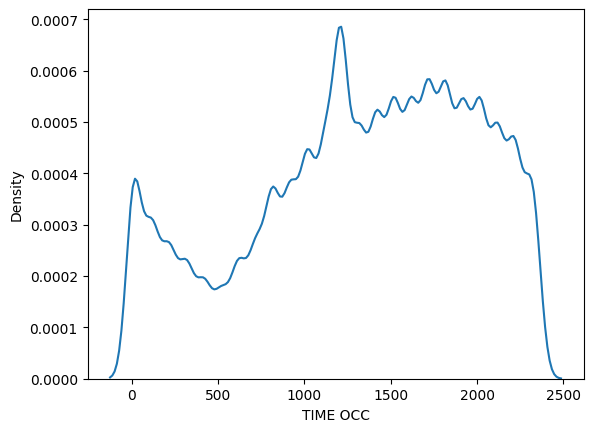

In [329]:
sns.kdeplot(df['TIME OCC'])
plt.show()

The above density plot has 2 peaks which is at 0 = 12:00 AM and around 1400 = 2:00 PM which if I understand would be the time where most crimes are commited in dataset.

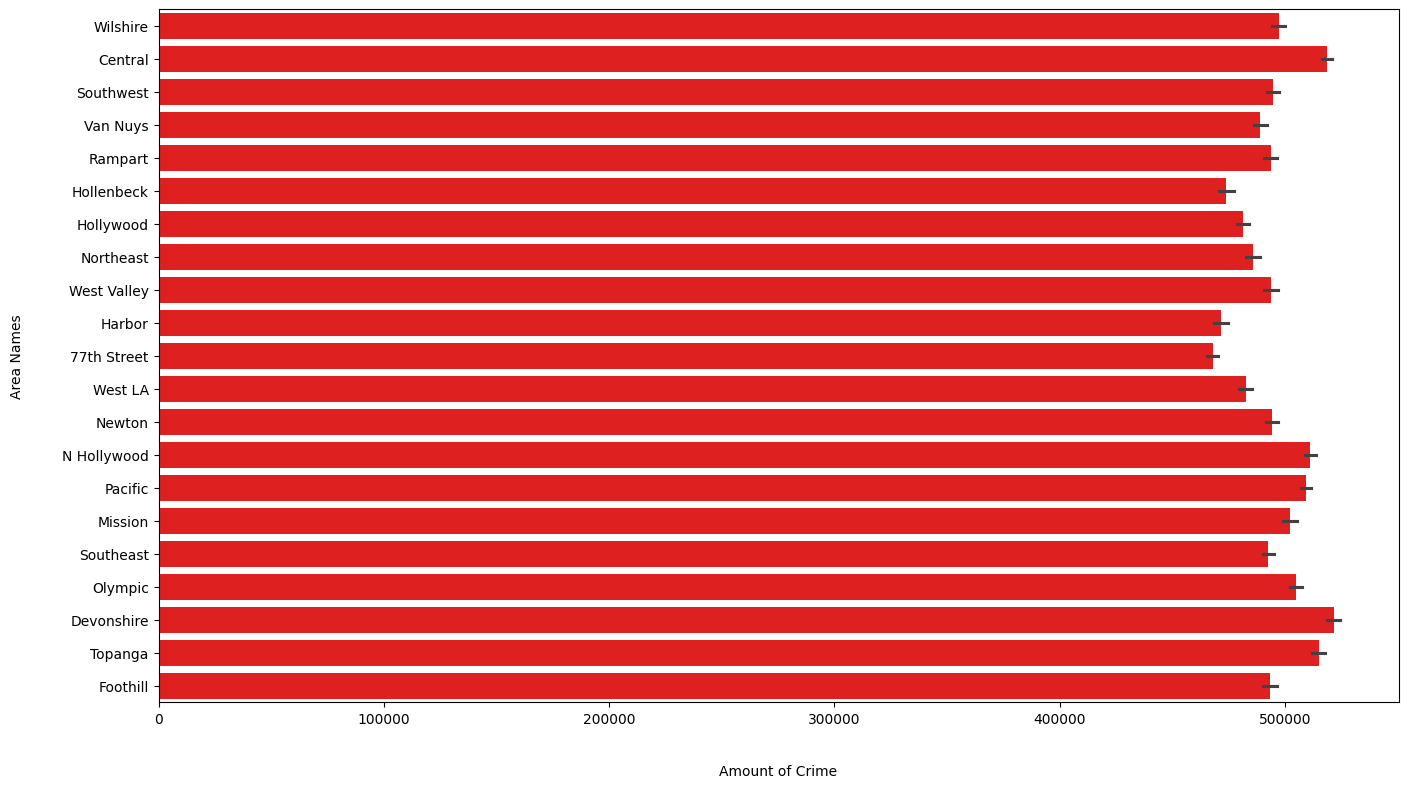

In [330]:
plt.figure(figsize=(16,9))
sns.barplot(df['AREA NAME'], color='red')
plt.xlabel('\n\nAmount of Crime')
plt.ylabel('Area Names\n\n')
plt.show()

The above Barplot shows the amount of Crimes done in different areas. Visualzing the plot, we see that most crimes are in Devonshire.

In [331]:
GenderVsCrimeCD = pd.crosstab(df['Vict Sex'], df['Crm Cd Desc'], dropna=True)
GenderVsCrimeCD

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Vict Sex,,,,,,,,,,,,,,,,,,,,,
-,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
F,607,68,14330,1221,35146,6,190,3770,2,3,...,259,21393,10198,1469,129,207,4333,8896,681,4
H,0,1,6,1,7,0,0,0,0,0,...,0,8,1,0,0,0,0,1,0,0
M,1211,643,38178,3113,39226,216,1190,376,5,3,...,225,28028,10959,2195,341,528,1961,2779,234,14
X,747,368,1003,500,459,35,1183,20,2,1,...,39,11635,4213,198,127,47,86,72,6,23


This contengiency Table shows the data based on Gender and Crime. 

Gender has 4 category which are M: Male, F: Female, H: Others, X: N/A

In [ ]:
conditioned_df_array = []
def YearBasedData(df):
    for i in range(len(df)):
        if df['Year'].iloc[i] > 2020 and df['Year'].iloc[i] < 2024:
            conditioned_df_array.append(df.iloc[i])

    return conditioned_df_array

In [ ]:
## Showwing that query actually works


conditioned_df = pd.DataFrame(YearBasedData(df))

In [ ]:
conditioned_df.sample(5) ## Showing random 5 samples

,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Premis Cd,Status Desc,LOCATION,Year,Month,Day
531322,600,18,Southeast,1834,354,THEFT OF IDENTITY,0922 0100 1822,26,F,502.0,Invest Cont,700 E 108TH ST,2022,12,1
646696,1455,21,Topanga,2146,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 1420 2028 0906,0,M,406.0,Adult Arrest,VANOWEN,2023,7,21
796847,1900,17,Devonshire,1752,903,CONTEMPT OF COURT,1817 2038 0913,19,F,501.0,Adult Arrest,10100 DE SOTO AV,2023,11,23
530380,1135,1,Central,159,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2003 0361 0913 0443 0329,0,M,502.0,Adult Other,600 S SANTA FE AV,2022,5,17
288982,800,12,77th Street,1257,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 0344 0385,0,X,101.0,Invest Cont,HOOVER ST,2021,11,8


These are the crimes done from year start of 2021 - start of 2024.

<Axes: xlabel='Month', ylabel='Status Desc'>

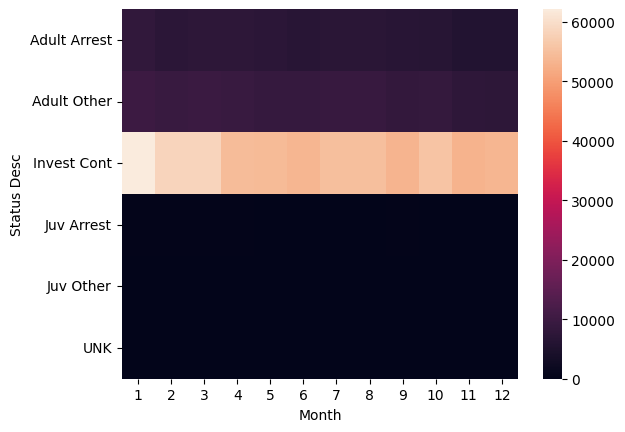

In [335]:
StatusDescVsMonth = pd.crosstab(df['Status Desc'], df['Month'])
sns.heatmap(StatusDescVsMonth)

Not really good comparision but we can see some analysis from the heatmap

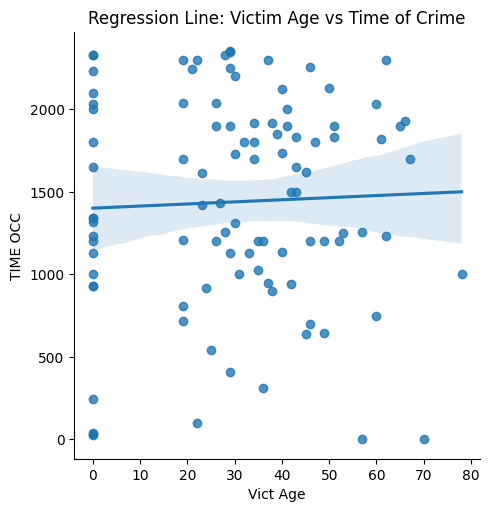

In [336]:
df_subset = df[1:100]

sns.lmplot(x='Vict Age', y='TIME OCC', data=df_subset)

plt.title("Regression Line: Victim Age vs Time of Crime")
plt.show()


We can see that there is a slight postive relation between those age and time. But without the regression line it seems that it wouldn't really make sense.

Thank you!!